# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import numpy as np

def mvstd(thelist):
    # Mean
    m = sum(thelist) / len(thelist)
    
    tmp = []
    
    for n in range(len(thelist)):
        vt = (thelist[n] - m) ** 2
        tmp.append(vt)
        
    # Varience 
    v = sum(tmp) / (len(tmp) -1)
   
    # Standard Deviation
    std = v ** 0.5
   
    # List of mean, variance, and 
    # std for checking against Numpy
    li = [m, v, std]
    
    # Compare
    nm = np.mean(thelist)
    nv = np.var(thelist, ddof=1)
    ns = np .std(thelist, ddof=1)
    nl = [nm, nv, ns]
    
    if li != nl:
        raise Exception('Your calculations are not correct')
    else:
        return m, v, std
    
      
sal = [3505, 2400, 3027, 2798, 3700, 3250, 2689]   
sm, sv, ss = mvstd(sal) 

print('Mea : ', sm)
print('Var : ', sv)
print('Std : ', ss)
 
 #%% md

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

Mea :  3052.714285714286
Var :  214387.90476190473
Std :  463.0204150595357


In [0]:
cust = [127, 80, 105, 92, 120, 115, 93]
np.cov(sal, cust)


array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
cm, cv, cs = mvstd(cust)
# sm, sv and ss for sales.

np.cov(sal, cust) / (ss * cs)


array([[27.14495851,  0.96283398],
       [ 0.96283398,  0.03683925]])

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv', 
                 index_col=0)

print(df.cov())
print(df.corr())


                     pclass  survived         age     sibsp     parch  \
pclass             0.701969 -0.127248   -3.954605  0.053090  0.013287   
survived          -0.127248  0.236250   -0.314343 -0.014088  0.034776   
age               -3.954605 -0.314343  165.850021 -2.559806 -1.459378   
sibsp              0.053090 -0.014088   -2.559806  1.085052  0.336833   
parch              0.013287  0.034776   -1.459378  0.336833  0.749195   
fare             -24.227788  6.146023  114.416613  8.641768  9.928031   
body              -2.876653  0.000000   81.622922 -8.708471  4.237190   
has_cabin_number  -0.249992  0.061406    1.463138 -0.003946  0.013316   

                         fare         body  has_cabin_number  
pclass             -24.227788    -2.876653         -0.249992  
survived             6.146023     0.000000          0.061406  
age                114.416613    81.622922          1.463138  
sibsp                8.641768    -8.708471         -0.003946  
parch                9.9280

# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

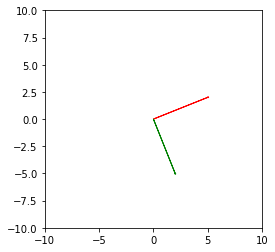

In [0]:
# "Orthogonal" and "perpendicular" are synonymous 

import matplotlib.pyplot as plt

a = np.array(
    [5, 2]
)
b = np.array(
    [2, -5]
)

plt.axes().set_aspect('equal')
plt.arrow(0,0, 
          a[0], 
          a[1],
          head_width=.1, 
          head_length=0.1, 
          color ='red'
          )

plt.arrow(0,0, 
          b[0], 
          b[1],
          head_width=.1, 
          head_length=0.1, 
          color ='green'
          )

plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()


## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

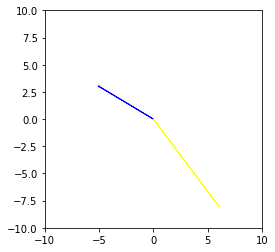

In [0]:
# No they are not orthogonal. They are if and only if the dot product is zero

a = np.array([-5,3,7])
b = np.array([6,-8,2])

plt.axes().set_aspect('equal')

plt.arrow(0,0, 
          a[0], 
          a[1],
          head_width=.1, 
          head_length=0.1, 
          color ='blue')

plt.arrow(0,0, 
          b[0], 
          b[1],
          head_width=.1, 
          head_length=0.1, 
          color ='yellow')

plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
import numpy.linalg as linalg
c = np.array(
    [2, -15, 6, 20]
)

#||c||^2
# Idiot, vectors form a right triangle, the length of
# which can be calculated with basic geomatry.  
print(linalg.norm(c)**2)

print(np.dot(c, c))

print(np.matmul(c.T, c))



665.0
665
665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

Your text here

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
f = np.array(
    [4, 12, 11, 9, 2]
)

uv = f * (1 / linalg.norm(f))
print(uv)


[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

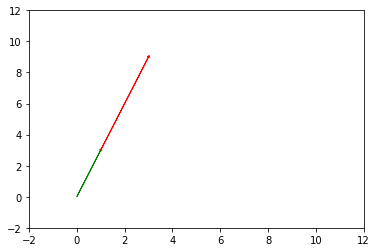

In [0]:
va = [1,3]
vb = [2,6]

plt.arrow(0,0, 
          va[0], 
          va[1],
          head_width=.1, 
          head_length=0.1, 
          color ='green')

plt.arrow(1,3, 
          vb[0], 
          vb[1],
          head_width=.1, 
          head_length=0.1, 
          color ='red')

plt.xlim(-2, 12)
plt.ylim(-2, 12)

plt.show()


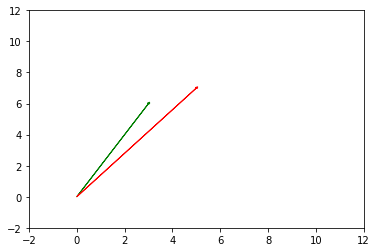

In [0]:
va1 = [3,6]
vb1 = [5,7]

plt.arrow(0,0, 
          va1[0], 
          va1[1],
          head_width=.1, 
          head_length=0.1, 
          color ='green')

plt.arrow(0,0, 
          vb1[0], 
          vb1[1],
          head_width=.1, 
          head_length=0.1, 
          color ='red')

plt.xlim(-2, 12)
plt.ylim(-2, 12)

plt.show()



## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



## 6.2 What does it mean to form a basis?

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

## 7.2 What does the rank of a matrix tell us?

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()